<a href="https://colab.research.google.com/github/dishankkalra23/Explore-Weather-Trends/blob/main/Explore_Weather_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [103]:
city_data = pd.read_csv("/content/drive/MyDrive/Explore Weather Trends/1. city_data.csv")

In [104]:
city_data.shape

(70792, 4)

In [105]:
city_data.sample(10)

,year,city,country,avg_temp
69776,1844,Xuzhou,China,13.83
1123,1864,Agra,India,NaN
13398,1894,Caracas,Venezuela,24.25
43158,1820,Montreal,Canada,3.88
28695,1866,Jakarta,Indonesia,25.96
56491,1854,San Antonio,United States,19.53
5346,1824,Baghdad,Iraq,22.96
9748,2012,Bhopal,India,25.82
68940,1878,Wichita,United States,13.66
57868,1874,Santiago,Philippines,25.70


# List of Cities in India

In [106]:
Indian_cities = city_data[city_data['country']=='India']['city'].unique()
Indian_cities

array(['Agra', 'Ahmadabad', 'Allahabad', 'Amritsar', 'Bangalore',
       'Bhopal', 'Delhi', 'Haora', 'Hyderabad', 'Indore', 'Jaipur',
       'Kanpur', 'Ludhiana', 'Nagpur', 'New Delhi', 'Patna', 'Pune',
       'Rajkot', 'Ranchi', 'Surat', 'Vadodara', 'Varanasi'], dtype=object)

## Number of Indian Cities

In [107]:
len(Indian_cities)

22

# Indian city chosen: Hyderabad



## Number of rows in Hyderabad's data
Note - There are two cities with name as Hyderabad, one in India and other in Pakistan 

In [108]:
data_hyderabad = city_data[(city_data['country']=='India') & (city_data['city']=='Hyderabad')]
data_hyderabad.shape[0]

218

# Handling Missing values

In [109]:
data_hyderabad

,year,city,country,avg_temp
26146,1796,Hyderabad,India,26.53
26147,1797,Hyderabad,India,27.48
26148,1798,Hyderabad,India,26.20
26149,1799,Hyderabad,India,26.84
26150,1800,Hyderabad,India,26.88
...,...,...,...,...
26359,2009,Hyderabad,India,28.03
26360,2010,Hyderabad,India,27.69
26361,2011,Hyderabad,India,27.41
26362,2012,Hyderabad,India,28.02


## Note: Only column-4(avg_temp) has null values

In [110]:
data_hyderabad.isnull().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

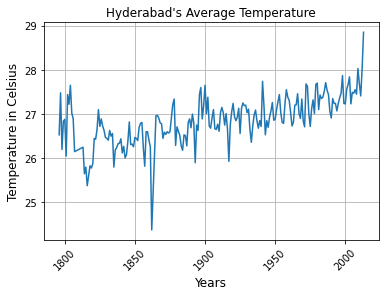

In [111]:
x_data = data_hyderabad['year']
y_data = data_hyderabad['avg_temp']

sns.lineplot(x=x_data,y=y_data,data=data_hyderabad)
plt.xlabel('Years',size=12)
plt.ylabel('Temperature in Celsius',size=12)
plt.title("Hyderabad's Average Temperature",size=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Filling missing values with mean value of column(avg_temp)

In [112]:
mean_val = data_hyderabad['avg_temp'].mean(axis=0,skipna=True)
mean_val

26.861563981042668

In [113]:
data_hyderabad_with_mean = data_hyderabad.fillna(mean_val)

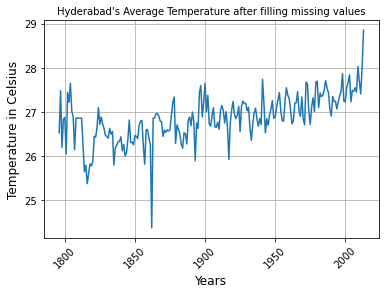

In [114]:
x_data_2 = data_hyderabad_with_mean['year']
y_data_2 = data_hyderabad_with_mean['avg_temp']

sns.lineplot(x=x_data_2,y=y_data_2,data=data_hyderabad_with_mean)
plt.xlabel('Years',size=12)
plt.ylabel('Temperature in Celsius',size=12)
plt.title("Hyderabad's Average Temperature after filling missing values",size=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Filling missing values with interpolation method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


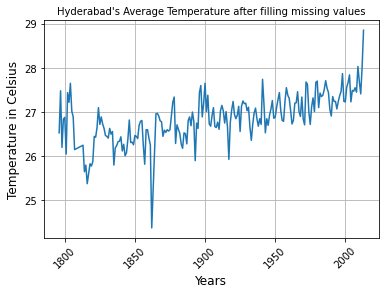

In [115]:
sns.lineplot(x=x_data,y=y_data,data=data_hyderabad.interpolate(inplace=True))
plt.xlabel('Years',size=12)
plt.ylabel('Temperature in Celsius',size=12)
plt.title("Hyderabad's Average Temperature after filling missing values",size=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [116]:
data_hyderabad.head()

,year,city,country,avg_temp
26146,1796,Hyderabad,India,26.53
26147,1797,Hyderabad,India,27.48
26148,1798,Hyderabad,India,26.20
26149,1799,Hyderabad,India,26.84
26150,1800,Hyderabad,India,26.88


In [117]:
data_hyderabad.tail()

,year,city,country,avg_temp
26359,2009,Hyderabad,India,28.03
26360,2010,Hyderabad,India,27.69
26361,2011,Hyderabad,India,27.41
26362,2012,Hyderabad,India,28.02
26363,2013,Hyderabad,India,28.85


# Moving Averages of Hyderabad's yearly


## Checking if there is any missing values( filled missing values using interpolate )

In [118]:
data_hyderabad.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

## Function to find moving averages of yearly temperature in Hyderabad

### Making a new column 'moving_avg'

In [119]:
check_data = data_hyderabad.copy()
check_data['moving_avg'] = np.nan
check_data

,year,city,country,avg_temp,moving_avg
26146,1796,Hyderabad,India,26.53,NaN
26147,1797,Hyderabad,India,27.48,NaN
26148,1798,Hyderabad,India,26.20,NaN
26149,1799,Hyderabad,India,26.84,NaN
26150,1800,Hyderabad,India,26.88,NaN
...,...,...,...,...,...
26359,2009,Hyderabad,India,28.03,NaN
26360,2010,Hyderabad,India,27.69,NaN
26361,2011,Hyderabad,India,27.41,NaN
26362,2012,Hyderabad,India,28.02,NaN


### Function: running_avg(window_size,rows,prev,new) 





In [120]:
def running_avg(window_size,rows,prev,new):
  for i in range(rows - window_size + 1):
    calc_running_avg = 0
    for j in range(i, i + window_size):
      calc_running_avg += prev.iloc[j]
    new.iloc[i + window_size - 1] = calc_running_avg/window_size
  return check_data

In [121]:
new = check_data['moving_avg']
prev = check_data['avg_temp']
rows = check_data.shape[0]
window_size = 25

result = running_avg(window_size,rows,prev,new)
print(result)

       year       city country  avg_temp  moving_avg
26146  1796  Hyderabad   India     26.53         NaN
26147  1797  Hyderabad   India     27.48         NaN
26148  1798  Hyderabad   India     26.20         NaN
26149  1799  Hyderabad   India     26.84         NaN
26150  1800  Hyderabad   India     26.88         NaN
...     ...        ...     ...       ...         ...
26359  2009  Hyderabad   India     28.03     27.4312
26360  2010  Hyderabad   India     27.69     27.4384
26361  2011  Hyderabad   India     27.41     27.4264
26362  2012  Hyderabad   India     28.02     27.4456
26363  2013  Hyderabad   India     28.85     27.5020

[218 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


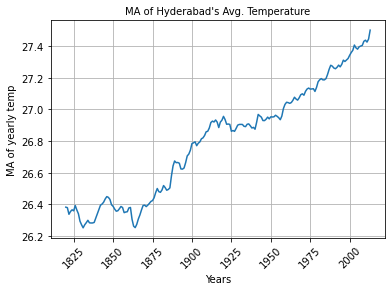

In [122]:
ax = sns.lineplot(x='year',y='moving_avg',data=check_data)
ax.set(xlabel='Years',ylabel='MA of yearly temp')
plt.title("MA of Hyderabad's Avg. Temperature",size=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using **rolling** method to find moving averages

In [123]:
check_data['MA_window_size'] = check_data['avg_temp'].rolling(window=50).mean()
check_data.head(30)

,year,city,country,avg_temp,moving_avg,MA_window_size
26146,1796,Hyderabad,India,26.530000,NaN,NaN
26147,1797,Hyderabad,India,27.480000,NaN,NaN
26148,1798,Hyderabad,India,26.200000,NaN,NaN
26149,1799,Hyderabad,India,26.840000,NaN,NaN
26150,1800,Hyderabad,India,26.880000,NaN,NaN
26151,1801,Hyderabad,India,26.050000,NaN,NaN
26152,1802,Hyderabad,India,27.440000,NaN,NaN
26153,1803,Hyderabad,India,27.220000,NaN,NaN
26154,1804,Hyderabad,India,27.650000,NaN,NaN
26155,1805,Hyderabad,India,27.020000,NaN,NaN


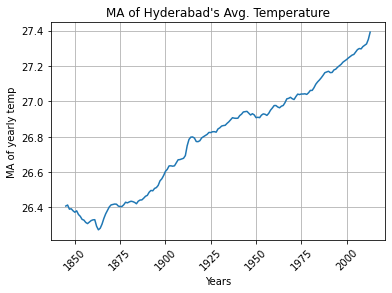

In [124]:
ax = sns.lineplot(x='year',y='MA_window_size',data=check_data)
ax.set(xlabel='Years',ylabel='MA of yearly temp')
plt.title("MA of Hyderabad's Avg. Temperature")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Global Data

In [125]:
global_data = pd.read_csv("/content/drive/MyDrive/Explore Weather Trends/2. global_data.csv")

In [126]:
global_data.shape

(266, 2)

In [127]:
global_data.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [128]:
global_data[global_data['year']>1795].head(10)

,year,avg_temp
46,1796,8.27
47,1797,8.51
48,1798,8.67
49,1799,8.51
50,1800,8.48
51,1801,8.59
52,1802,8.58
53,1803,8.50
54,1804,8.84
55,1805,8.56


## Line chart of global avg. temp.

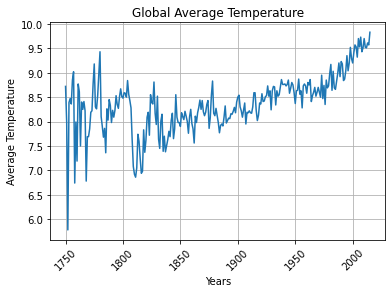

In [129]:
x_data_4 = global_data['year']
y_data_4 = global_data['avg_temp']

ax = sns.lineplot(x=x_data_4,y=y_data_4,data=global_data)
ax.set(xlabel='Years',ylabel='Average Temperature',title='Global Average Temperature')
plt.xticks(rotation=45)
plt.grid('True')
plt.show()

In [130]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [131]:
global_data.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


# Comparing Local(Hyderabad) and Global Temperature

## Importing local-global data to compare trends

In [132]:
df_trends = pd.read_csv("/content/drive/MyDrive/Explore Weather Trends/5. global_city_data.csv")
df_trends.shape

(218, 3)

## Checking for missing values

In [133]:
df_trends.isnull().sum()

year           0
city_temp      7
global_temp    0
dtype: int64

In [134]:
df_trends[df_trends.isnull().any(axis=1)]

,year,city_temp,global_temp
12,1808,NaN,7.63
13,1809,NaN,7.08
14,1810,NaN,6.92
15,1811,NaN,6.86
16,1812,NaN,7.05
67,1863,NaN,8.11
68,1864,NaN,7.98


### Index of missing values

In [135]:
missing_values = df_trends[df_trends.isnull().any(axis=1)].index.values.tolist()
missing_values

[12, 13, 14, 15, 16, 67, 68]

## Filling missing values

In [136]:
df_trends.interpolate(inplace=True)

In [137]:
for i in missing_values:
  print(df_trends.iloc[i],"\n")

year           1808.000000
city_temp        26.166667
global_temp       7.630000
Name: 12, dtype: float64 

year           1809.000000
city_temp        26.183333
global_temp       7.080000
Name: 13, dtype: float64 

year           1810.00
city_temp        26.20
global_temp       6.92
Name: 14, dtype: float64 

year           1811.000000
city_temp        26.216667
global_temp       6.860000
Name: 15, dtype: float64 

year           1812.000000
city_temp        26.233333
global_temp       7.050000
Name: 16, dtype: float64 

year           1863.00
city_temp        25.24
global_temp       8.11
Name: 67, dtype: float64 

year           1864.00
city_temp        26.10
global_temp       7.98
Name: 68, dtype: float64 



## Finding Moving Averages of local(Hyderabad) and global data

In [138]:
window_size = 8
df_trends['MA_city_temp'] = df_trends['city_temp'].rolling(window=window_size).mean()
df_trends['MA_global_temp'] = df_trends['global_temp'].rolling(window=window_size).mean()

df_trends.head(10)

,year,city_temp,global_temp,MA_city_temp,MA_global_temp
0,1796,26.53,8.27,NaN,NaN
1,1797,27.48,8.51,NaN,NaN
2,1798,26.20,8.67,NaN,NaN
3,1799,26.84,8.51,NaN,NaN
4,1800,26.88,8.48,NaN,NaN
5,1801,26.05,8.59,NaN,NaN
6,1802,27.44,8.58,NaN,NaN
7,1803,27.22,8.50,26.8300,8.51375
8,1804,27.65,8.84,26.9700,8.58500
9,1805,27.02,8.56,26.9125,8.59125


# Hyderabad vs Global Temperature

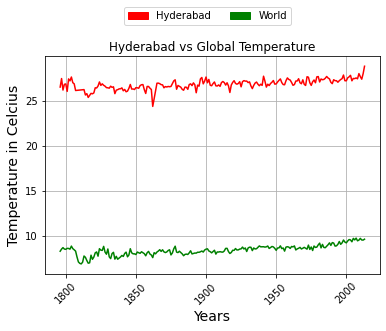

In [139]:
plt.plot(df_trends['year'],df_trends['city_temp'],color='red')
plt.plot(df_trends['year'],df_trends['global_temp'],color='green')

plt.title('Hyderabad vs Global Temperature')
plt.xlabel('Years',size=14)
plt.ylabel('Temperature in Celcius',size=14)
plt.xticks(rotation=45)

red_patch = mpatches.Patch(color='red',label='Hyderabad')
green_patch = mpatches.Patch(color='green',label='World')
plt.legend(handles=[red_patch,green_patch],bbox_to_anchor =(0.75, 1.25), ncol = 2)
plt.grid(True)
plt.show()

In [140]:
df_trends[df_trends['year'] > 1803 ].head(10)

,year,city_temp,global_temp,MA_city_temp,MA_global_temp
8,1804,27.650000,8.84,26.970000,8.58500
9,1805,27.020000,8.56,26.912500,8.59125
10,1806,26.890000,8.43,26.998750,8.56125
11,1807,26.150000,8.28,26.912500,8.53250
12,1808,26.166667,7.63,26.823333,8.42625
13,1809,26.183333,7.08,26.840000,8.23750
14,1810,26.200000,6.92,26.685000,8.03000
15,1811,26.216667,6.86,26.559583,7.82500
16,1812,26.233333,7.05,26.382500,7.60125
17,1813,26.250000,7.74,26.286250,7.49875


# 8 years MA Temperature comparison between Hyderabad and World

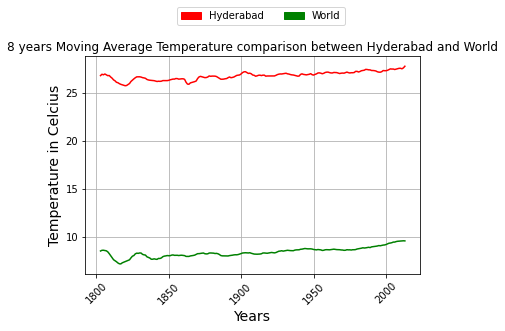

In [141]:
plt.plot(df_trends['year'],df_trends['MA_city_temp'],color='red')
plt.plot(df_trends['year'],df_trends['MA_global_temp'],color='green')

plt.title('8 years Moving Average Temperature comparison between Hyderabad and World')
plt.xlabel('Years',size=14)
plt.ylabel('Temperature in Celcius',size=14)
plt.xticks(rotation=45)

red_patch = mpatches.Patch(color='red',label='Hyderabad')
green_patch = mpatches.Patch(color='green',label='World')
plt.legend(handles=[red_patch,green_patch],bbox_to_anchor =(0.79, 1.25), ncol = 2)
plt.grid(True)
plt.show()

In [142]:
df_trends.corr(method ='pearson')

,year,city_temp,global_temp,MA_city_temp,MA_global_temp
year,1.000000,0.665212,0.765267,0.848356,0.859065
city_temp,0.665212,1.000000,0.771909,0.771301,0.745213
global_temp,0.765267,0.771909,1.000000,0.779534,0.881786
MA_city_temp,0.848356,0.771301,0.779534,1.000000,0.920007
MA_global_temp,0.859065,0.745213,0.881786,0.920007,1.000000
